# Reinforced learning, työllistyminen ja Suomen sosiaaliturva

Tässä tehdään laskelmat artikkelia varten. Käytössä on gym-ympäristö _unemployment-v1_ , johon on toteutettu yksityiskohtaisesti sosiaaliturvaa eri tiloissa.

In [1]:
# for Colab, install fin_benefits and unemployment-gym from Github
#!pip install -q git+https://github.com/ajtanskanen/benefits.git  
#!pip install -q git+https://github.com/ajtanskanen/econogym.git
#!pip install -q git+https://github.com/ajtanskanen/lifecycle-rl.git

# and then restart kernel
  
  # For a specific version:
#!pip install tensorflow==1.15
#!pip install stable-baselines==2.8
  
# restart kernel after running pip's

In [2]:
#import sys
#print(sys.path)
#sys.path.append('/usr/local/python3.7/site-packages')

Then load all modules and set parameters for simulations.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from lifecycle_rl import Lifecycle

%matplotlib inline
%pylab inline

# varoitukset piiloon (Stable baseline ei ole vielä Tensorflow 2.0-yhteensopiva, ja Tensorflow 1.15 valittaa paljon)
# ei taida toimia piilottaminen
import warnings
warnings.filterwarnings('ignore')


The TensorFlow contrib module will not be included in TensorFlow 2.0.
For more information, please see:
  * https://github.com/tensorflow/community/blob/master/rfcs/20180907-contrib-sunset.md
  * https://github.com/tensorflow/addons
  * https://github.com/tensorflow/io (for I/O related ops)
If you depend on functionality not listed there, please file an issue.

Populating the interactive namespace from numpy and matplotlib


In [2]:
# parameters for the simulation
# episode = 51 / 205 timesteps (1y/3m timestep)
pop_size=50_000 # size of the population to be simulated
size1=100_000_000 #0_000 # number of timesteps in phase 1 training (callback not used)
size2=100_000_000 #0_000 # number of timesteps in phase 2 training (callback is used to save the best results)
size3=20_000_000 # number of timesteps in phase 1 training (callback not used) for policy changes
batch1=1_00 # size of minibatch in phase 1 as number of episodes
batch2=9_00  # size of minibatch in phase 1 as number of episodes
callback_minsteps=batch2 # how many episodes callback needs 
deterministic=False # use deterministic prediction (True) or probabilitic prediction (False)
mortality=False # include mortality in computations
randomness=True # include externally given, random state-transitions (parental leaves, disability, lay-offs) 
pinkslip=True # include lay-offs at 5 percent level each year
rlmodel='acktr' # use ACKTR algorithm
twostage=False # ajataan kahdessa vaiheessa vai ei
perusmalli='best/malli_perus_week'
perusresults='results/perus_results_week'

# Nykymalli 

Lasketaan työllisyysasteet nykymallissa.

In [3]:
cc1=Lifecycle(env='unemployment-v1',minimal=False,mortality=mortality,perustulo=False,
              randomness=randomness,pinkslip=pinkslip,plotdebug=False,timestep=1.0/52)
cc1.explain()
cc1.run_results(debug=False,steps1=size1,steps2=size2,pop=pop_size,deterministic=deterministic,
                train=True,predict=True,batch1=batch1,batch2=batch2,
                save=perusmalli,plot=True,cont=True,start_from=perusmalli,results=perusresults,
                callback_minsteps=callback_minsteps,rlmodel=rlmodel,twostage=twostage)

No mortality included
Parameters of lifecycle:
timestep 0.019230769230769232
gamma 0.9983977924275975 (0.9200000000000014 per anno)
min_age 20
max_age 70
min_retirementage 63.5
max_retirementage 68
ansiopvraha_kesto300 None
ansiopvraha_kesto400 None
ansiopvraha_toe None
perustulo False
karenssi_kesto 0.25
mortality False
randomness True
include_putki None
include_pinkslip True

train...
phase 1
batch 9 learning rate 0.125 scaled 0.375




Instructions for updating:
Use keras.layers.flatten instead.
Instructions for updating:
Please use `layer.__call__` method instead.








Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where






training...








---------------------------------
| explained_variance | 0.145    |
| fps                | 3415     |
| nupdates           | 1        |
| policy_entropy     | 0.938    |
| policy_loss        | 474      |
| total_timesteps    | 0        |
| value_loss         | 2.63e+05 |
-------------------------

KeyboardInterrupt: 

No mortality included


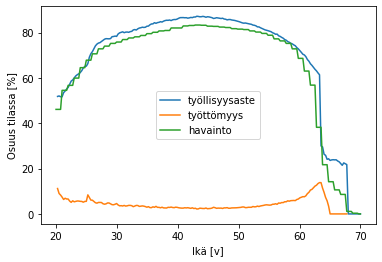

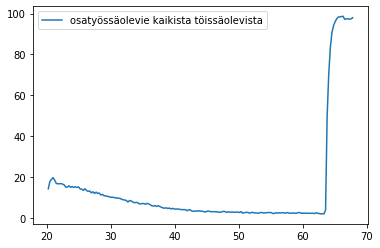

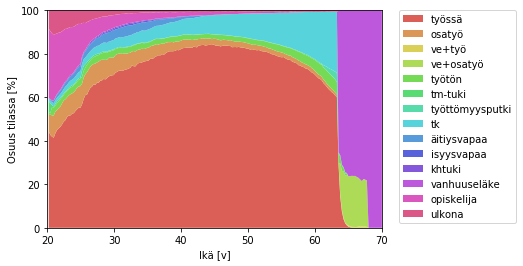

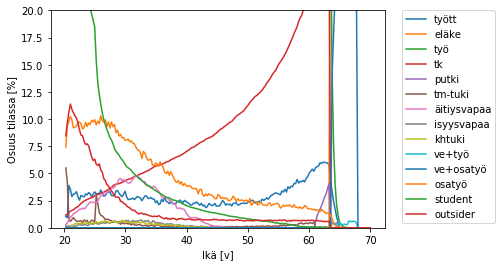

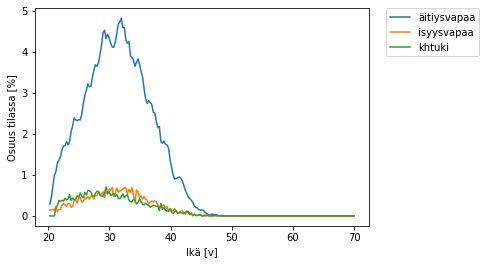

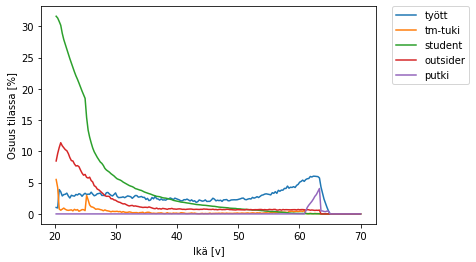

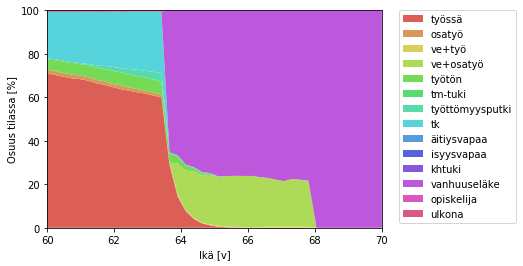

keskimääräinen työttömyysaste 4.232271549327371


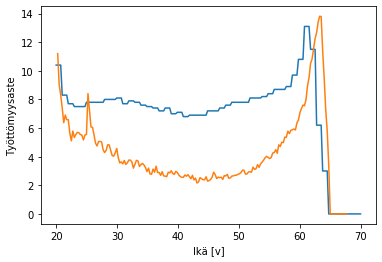

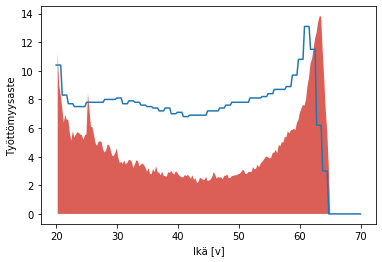

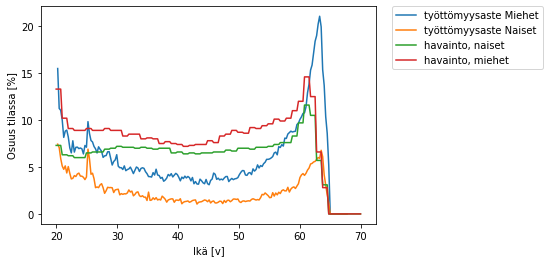

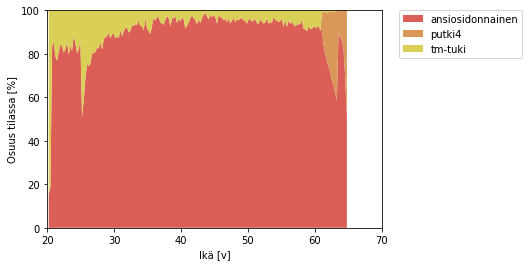

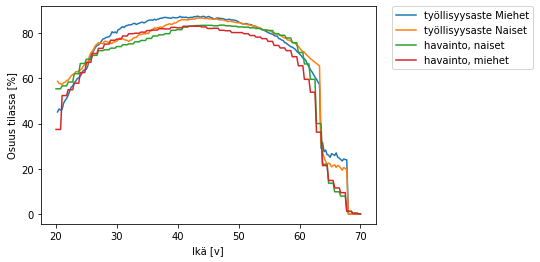

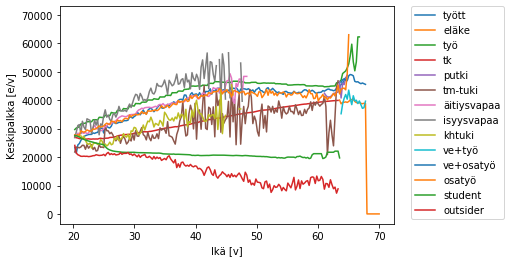

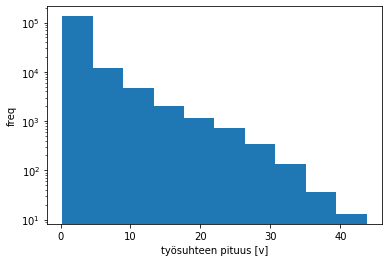

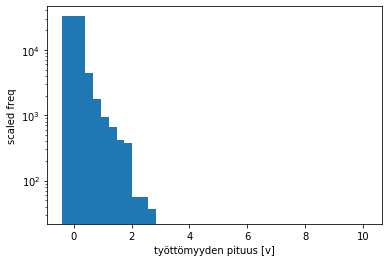

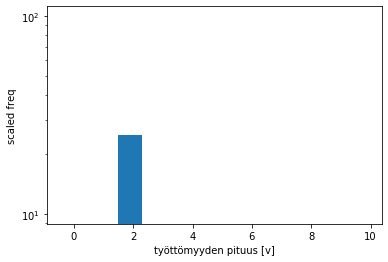

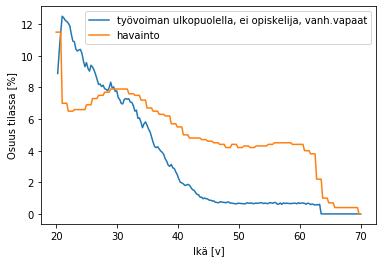

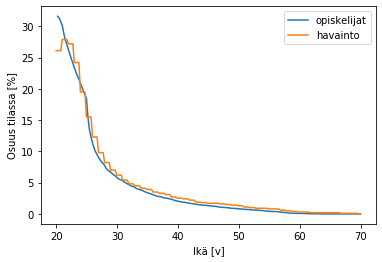

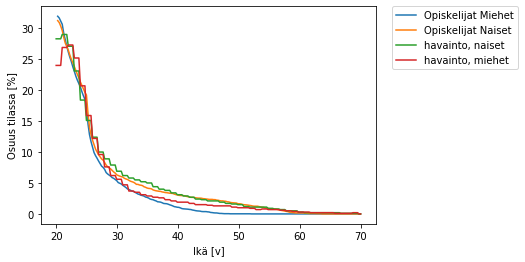

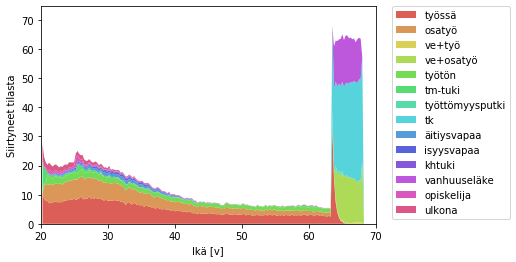

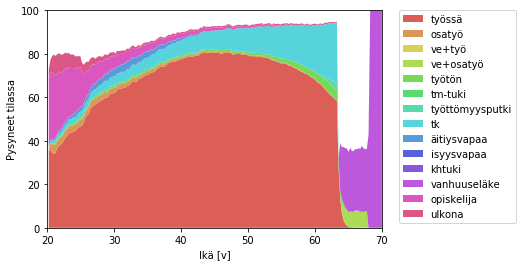

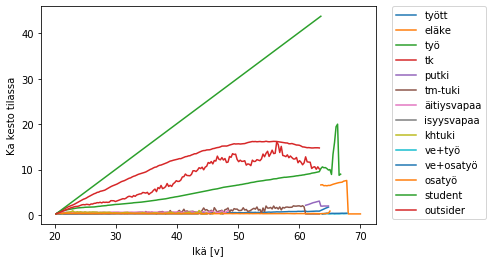

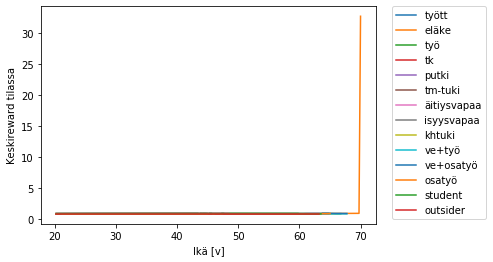

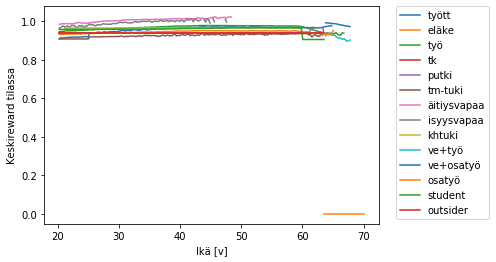

No handles with labels found to put in legend.


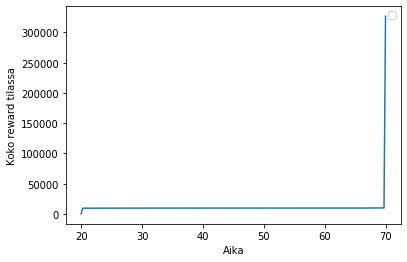

Yhteensä reward 225.7237694929929


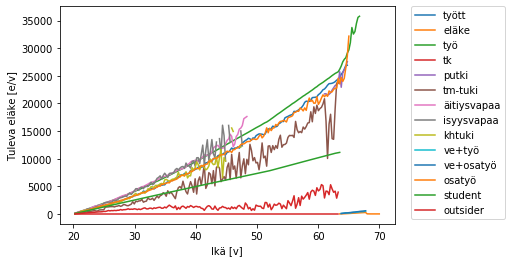

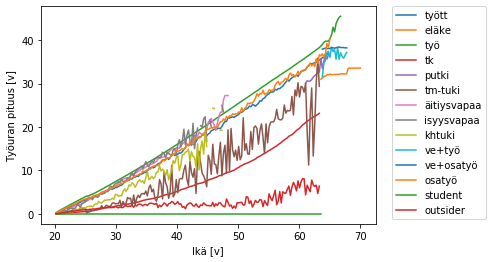

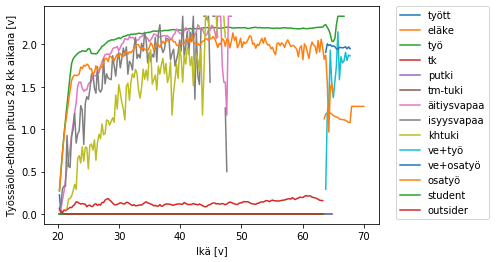

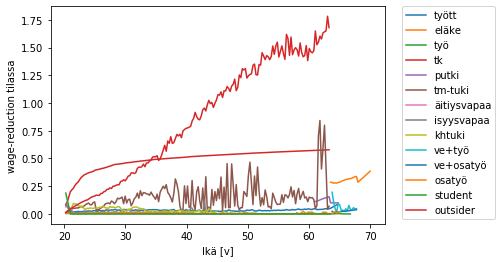

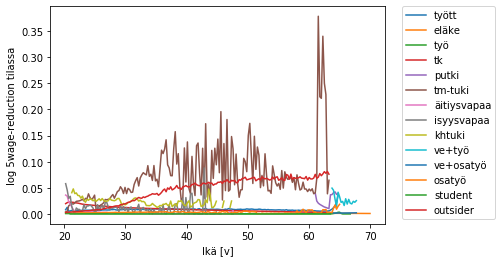

In [6]:
cc1b=Lifecycle(env='unemployment-v1',minimal=False,mortality=mortality,perustulo=False,
              randomness=randomness,pinkslip=pinkslip,plotdebug=False)
cc1b.render(load=perusresults)

In [7]:
#cc1q=Lifecycle(env='unemployment-v1',minimal=False,mortality=mortality,perustulo=False,
#              randomness=randomness,pinkslip=pinkslip,plotdebug=False)
#cc1q.explain()
#cc1q.run_results(debug=False,steps1=1_000_000,steps2=size2,pop=1_000,deterministic=deterministic,
#                train=True,predict=True,batch1=1,batch2=batch2,
#                save=perusmalli+'_dqn',plot=True,cont=False,start_from=perusmalli+'_dqn',results=perusresults+'_dqn',
#                callback_minsteps=callback_minsteps,rlmodel='dqn',twostage=False)

In [8]:
x=np.linspace(0,30,40)
q=np.random.uniform(20,size=20)
h,x2=np.histogram(q,x)
print(x2,h)

[ 0.          0.76923077  1.53846154  2.30769231  3.07692308  3.84615385
  4.61538462  5.38461538  6.15384615  6.92307692  7.69230769  8.46153846
  9.23076923 10.         10.76923077 11.53846154 12.30769231 13.07692308
 13.84615385 14.61538462 15.38461538 16.15384615 16.92307692 17.69230769
 18.46153846 19.23076923 20.         20.76923077 21.53846154 22.30769231
 23.07692308 23.84615385 24.61538462 25.38461538 26.15384615 26.92307692
 27.69230769 28.46153846 29.23076923 30.        ] [0 1 2 1 0 3 0 0 1 0 1 1 0 1 0 0 0 0 2 1 0 1 1 2 1 1 0 0 0 0 0 0 0 0 0 0 0
 0 0]


In [9]:
print(h,x2)
print(h.shape,x2.shape)

[0 1 2 1 0 3 0 0 1 0 1 1 0 1 0 0 0 0 2 1 0 1 1 2 1 1 0 0 0 0 0 0 0 0 0 0 0
 0 0] [ 0.          0.76923077  1.53846154  2.30769231  3.07692308  3.84615385
  4.61538462  5.38461538  6.15384615  6.92307692  7.69230769  8.46153846
  9.23076923 10.         10.76923077 11.53846154 12.30769231 13.07692308
 13.84615385 14.61538462 15.38461538 16.15384615 16.92307692 17.69230769
 18.46153846 19.23076923 20.         20.76923077 21.53846154 22.30769231
 23.07692308 23.84615385 24.61538462 25.38461538 26.15384615 26.92307692
 27.69230769 28.46153846 29.23076923 30.        ]
(39,) (40,)


In [10]:
q

array([19.17370788,  4.24748947, 13.87809832, 17.7396172 ,  4.15070647,
        2.32376943,  8.32976068, 18.14469426, 10.56915729, 19.681719  ,
        6.81767205,  1.90995189,  8.74288811,  1.15043609, 15.20832251,
       13.95657021, 17.11462885, 16.69726506,  4.3134858 ,  1.9838473 ])

<BarContainer object of 39 artists>

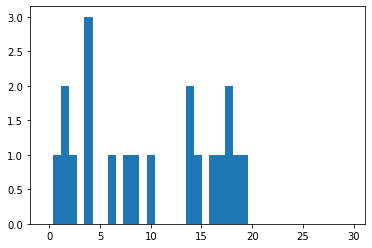

In [11]:
plt.bar(x[:-1],h)